<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---
* Giảng viên: Đặng Văn Nam
* Email: dangvannam@humg.edu.n

---
* Họ tên sinh viên:
* Mã sinh viên:
* Lớp/Nhóm môn học:
* Email:

---

### CHƯƠNG 3: HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING) - PHẦN 04
---
Một thuật toán học máy được gọi là học có giám sát (supervised learning) nếu việc xây dựng mô hình dự đoán mối quan hệ giữa đầu vào và đầu ra được thực hiện dựa trên các cặp (đầu vào - input, đầu ra - label) đã biết trong tập huấn luyện. Đây là nhóm thuật toán phổ biến nhất trong các thuật toán machine learning.

Tập dữ liệu học (Training data) bao gồm các quan sát (Examples, Observations), mà mỗi quan sát được gắn kèm với một giá trị đầu ra mong muốn (Label)
<img src='pic/label.png' width='600px'>

Học có giám sát bao gồm 2 loại:
* Phân loại (Classification): Nếu nhãn (y – Target) thuộc tập rời rạc và hữu hạn
* Hồi quy (Regression): Nếu nhãn (y – Target) là biến liên tục (các số thực) ví dụ như dự báo nhiệt độ, giá nhà, mức tiêu thụ điện năng…

<img src='pic/type.png' width='400px' heith='300px'>

# B| Hồi quy (Regression)

## I) THUẬT TOÁN HỒI QUY TUYẾN TÍNH (Linear Regression)
---
<img src='pic/linear.png' width='400px'>




## VÍ DỤ :
## DỰ ĐOÁN GIÁ NHÀ
---
Tập dữ liệu bao gồm 506 mẫu về các thông số của một căn hộ và giá bán căn hộ đó. Các thông số bao gồm:

1. CRIM: Tỷ lệ tội phạm bình quân đầu người trong thị trấn.
2. ZN: Tỷ lệ đất quy hoạch cho các khu vực trện 20.000 feet vuông.
3. INDUS: Tỷ lệ diện tích kinh doanh phi bán lẻ trên mỗi thị trấn
4. CHAS: Căn hộ có gần sông không (1-Gần sông | 0 - Không gần sông)
5. NOX: Nồng độ Oxit Nitric trong khu vực 
6. RM: Số phòng trung bình của mỗi ngôi nhà.
7. AGE: Tỷ lệ các căn hộ có chủ sở hữu được xây dựng trước năm 1940
8. DIS: Khoảng cách có trọng số tới 5 trung tâm việc làm Boston
9. RAD: Chỉ số khả năng tiếp cận các đường cao tốc hướng tâm.
10. TAX: Thuế xuất bất động sản (/$10.000)
11. PTRATIO: Tỷ lệ học sinh - Giáo viên của thị trấn
12. B: Tỷ lệ người da màu trong thị trấn.
13. LSTAT: Phần trăm dân số có mức thấp hơn mức trung bình

--------------------------------------
Target: MEDV - Giá trị trung bình của ngồi nhà (x$1000)

<img src='pic/pricehouse.png' width='400px'>

### A. Chuẩn bị dữ liệu
---
Đọc dữ liệu mẫu từ Dataset của Sklearn vào Dataframe:

In [1]:
#Load dữ liệu từ datasets:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston["MEDV"] = boston.target
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [2]:
#Hiển thị 5 dòng dữ liệu đầu tiên:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#Hiển thị 5 dòng dữ liệu cuối cùng:
df_boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [4]:
#Các đặc trưng thống kê của các thuộc tính độc lập (input):
df_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
#Quan sát các đặc trưng thống kê của Giá nhà tại Boston: Target (thuộc tính phụ thuộc)
df_boston[['MEDV']].describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


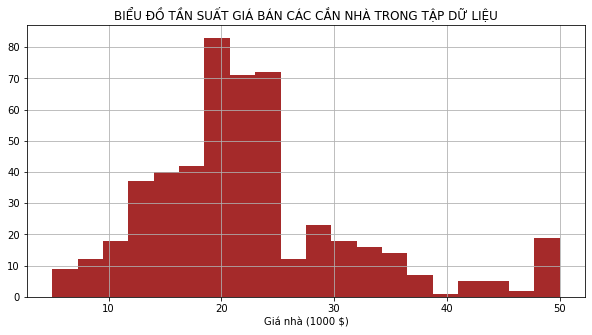

In [6]:
import matplotlib.pyplot as plt
price = df_boston[['MEDV']] #Lọc lấy dữ liệu thuộc tính giá nhà

#Vẽ biểu đồ tần suất (histogram):
plt.figure(figsize=(10,5))
plt.hist(price, bins = 20, color='brown')
plt.title('BIỂU ĐỒ TẦN SUẤT GIÁ BÁN CÁC CẮN NHÀ TRONG TẬP DỮ LIỆU')
plt.xlabel('Giá nhà (1000 $)')
plt.grid(True)
plt.show()

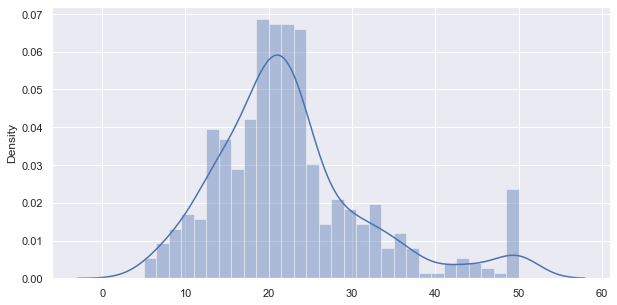

In [7]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Sử dụng thư viện seaborn:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(price, bins=30)
plt.show()

<AxesSubplot:>

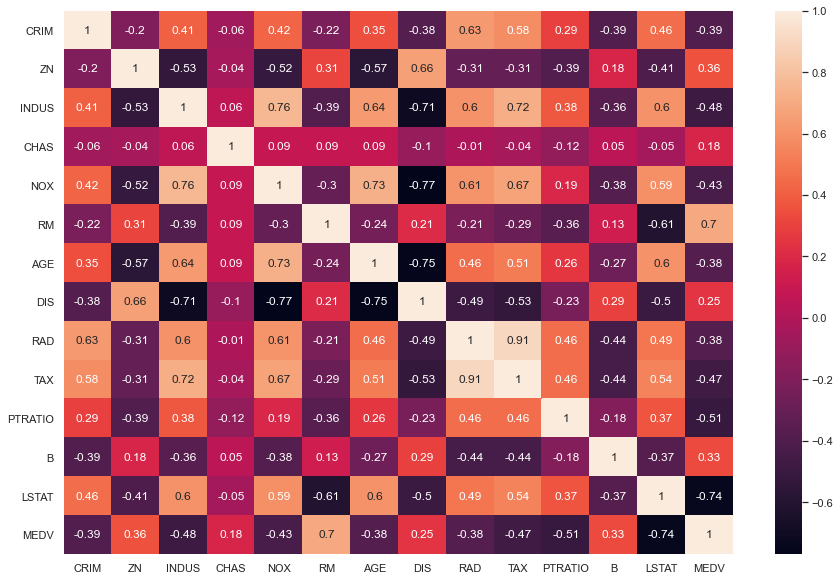

In [8]:
#Xác định mức độ ảnh hưởng của các thuộc tính tới giá bán một căn nhà:
#Xác định hệ số tương quan trong tập dữ liệu

correlation_matrix = df_boston.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)

**Mức độ ảnh hưởng của 13 thuộc tính tới giá của một căn nhà 2 là khác nhau:**
1. CRIM: Tỷ lệ tội phạm bình quân đầu người trong thị trấn (-0.39)
2. ZN: Tỷ lệ đất quy hoạch cho các khu vực trện 20.000 feet vuông (0.36)
3. INDUS: Tỷ lệ diện tích kinh doanh phi bán lẻ trên mỗi thị trấn (-0.48)
4. CHAS: Căn hộ có gần sông không (1-Gần sông | 0 - Không gần sông) (0.18)
5. NOX: Nồng độ Oxit Nitric trong khu vực (-0.43)
6. RM: Số phòng trung bình của mỗi ngôi nhà (0.7)
7. AGE: Tỷ lệ các căn hộ có chủ sở hữu được xây dựng trước năm 1940 (-0.38)
8. DIS: Khoảng cách có trọng số tới 5 trung tâm việc làm Boston (0.25)
9. RAD: Chỉ số khả năng tiếp cận các đường cao tốc hướng tâm (-0.38)
10. TAX: Thuế xuất bất động sản (/$10.000) (-0.47)
11. PTRATIO: Tỷ lệ học sinh - Giáo viên của thị trấn (-0.51)
12. B: Tỷ lệ người da màu trong thị trấn (0.33)
13. LSTAT: Phần trăm dân số có mức thấp hơn mức trung bình (-0.74)

Có 2 thuộc tính ảnh hưởng mạnh nhất tới giá bán của một căn nhà:

    * RM (0.7): Số phòng trung bình của một căn nhà - Tương quan thuận
    * LSTAT (-0.74): Phần trăm dân số có mức thấp hơn mức trung bình - Tương quan nghịch

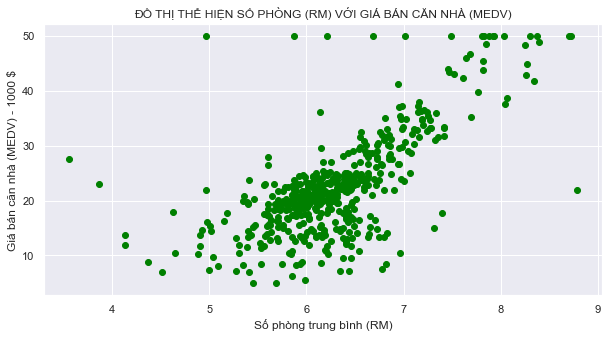

In [9]:
#Trực quan hóa dữ liệu số phòng (RM) với giá bán nhà (MEDV):
plt.figure(figsize=(10,5))
plt.scatter(df_boston['RM'],
            df_boston['MEDV'],
            marker='o', 
            color='green')
plt.title('ĐỒ THỊ THỂ HIỆN SỐ PHÒNG (RM) VỚI GIÁ BÁN CĂN NHÀ (MEDV)')
plt.xlabel('Số phòng trung bình (RM)')
plt.ylabel('Giá bán căn nhà (MEDV) - 1000 $')
plt.grid(True)
plt.show()

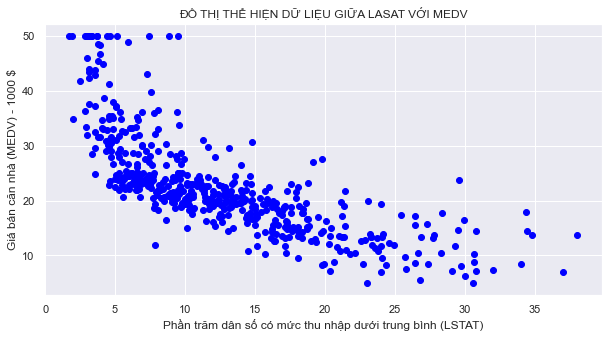

In [10]:
#Trực quan hóa dữ liệu phần trăm dân số thu nhập dưới mức trung bình (LSTAT) 
#với giá bán nhà (MEDV):
plt.figure(figsize=(10,5))
plt.scatter(df_boston['LSTAT'],
            df_boston['MEDV'],
            marker='o', 
            color='Blue')
plt.title('ĐỒ THỊ THỂ HIỆN DỮ LIỆU GIỮA LASAT VỚI MEDV')
plt.xlabel('Phần trăm dân số có mức thu nhập dưới trung bình (LSTAT)')
plt.ylabel('Giá bán căn nhà (MEDV) - 1000 $')
plt.show()

## B. Dự đoán giá nhà với mô hình hồi quy tuyến tính
---
1. Simple Linear Regression
2. Multiple Linear Regression

## 1. Hồi quy tuyến tính đơn giản ( 1 biến độc lập)

<img src='pic/linear.png' width='400px'>

**Hàm số:**
$$y=w_0+w_1 x$$


- $y$: biến phụ thuộc

- $x$: biến độc lập

- $w_0,w_1$: tham số của mô hình


### Xác định giá trị của tham số mô hình

- Xác định sai số ( hàm tổn thất) của mô hình.

- Chọn tham số để sai số nhỏ nhất.

**Sử dụng 1 tham số số phòng để dự đoán giá nhà:**

xây dựng phương trình: $$y_{MEDV} = w_0 + w_1 * x_{RM}$$

In [11]:
#Dữ liệu số phòng trung bình và giá nhà
df_boston[['RM','MEDV']].head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [12]:
#Tách các biến độc lập để xây dựng mô hình hồi quy
X_rm = df_boston['RM'].values

#Tách biến phụ thuộc:
y_prices = df_boston['MEDV'].values

#Hiển thị 10 bộ tham số đầu tiên:
print('Tỷ lệ số phòng:', X_rm[:10])
print('Giá phòng     :', y_prices[:10])

Tỷ lệ số phòng: [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004]
Giá phòng     : [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


#### Tách tập dữ liệu ra làm 2 phần dùng để huấn luyện và kiểm thử mô hình theo tỷ lệ (80% - 20%)
---

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rm, 
                                                    y_prices, 
                                                    test_size=0.2, 
                                                    random_state=50)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


In [14]:
X_train[:10]

array([[6.417],
       [4.138],
       [8.259],
       [6.404],
       [5.304],
       [6.081],
       [7.923],
       [5.   ],
       [5.683],
       [5.803]])

In [15]:
y_train[:10]

array([[13. ],
       [13.8],
       [42.8],
       [12.1],
       [10.4],
       [20. ],
       [50. ],
       [ 7.4],
       [ 5. ],
       [16.8]])

#### Khai báo sử dụng mô hình hồi quy tuyến tính và huấn luyện model với dữ liệu Huấn luyện
---

In [16]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression

#khai báo sử dụng model với các tham số mặc định
model_linear = LinearRegression()

#Các tham số của mô hình:
model_linear.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

**Các tham số của mô hình hồi quy tuyến tính xem chi tiết tại:**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Tham số quan trọng:
1. fit_intercept ( kiểu dữ liệu bool, default=True): Có tính toán trọng số w0 (bias) trong phương trình hay không?


In [17]:
#Huấn luyện model:
model_linear.fit(X_train, y_train)

LinearRegression()

In [18]:
#Lấy các hệ số của phương trình:
#hệ số w1:
w1 = model_linear.coef_
w1

array([[9.39289524]])

In [19]:
#Hệ số w0 (bias):
w0 = model_linear.intercept_
w0

array([-36.66357315])

### Phương trình đường thẳng xác định được:
$$\overline{y} = f(x) = w0 + w1*x_{RM} = -36.66357315 + 9.39289524*x_{RM}$$

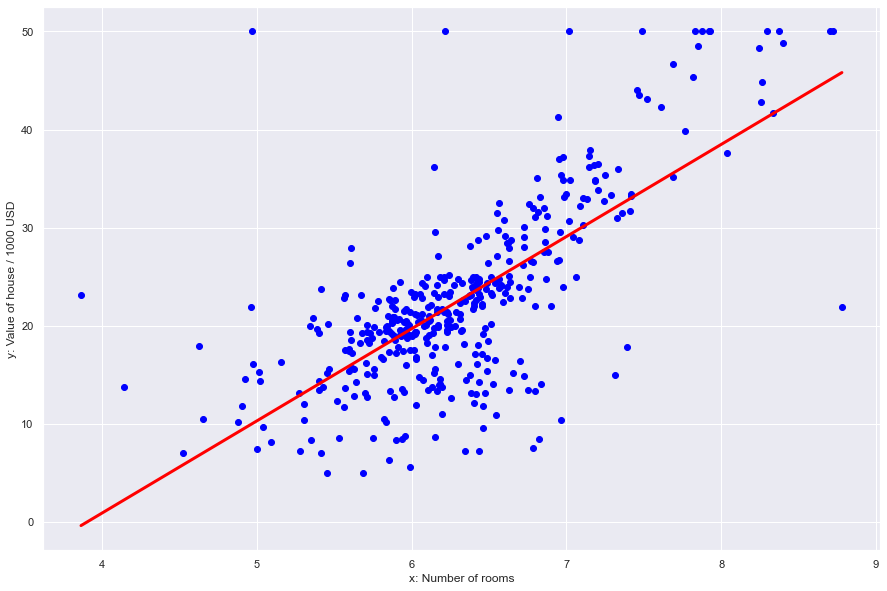

In [20]:
#Trực quan hóa đường hồi quy tuyến tính
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)

plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,model_linear.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

In [21]:
#Giả sử có một căn nhà mới với số phòng trung bình: 6
x_rm = 6
print('Số phòng TB: ', x_rm)
y_price = w0 +w1*x_rm
print('--> Giá bán căn nhà tương ứng: ', y_price)

Số phòng TB:  6
--> Giá bán căn nhà tương ứng:  [[19.69379829]]


In [22]:
#Kiểm tra trên tập Test:
X_test = X_test.reshape(-1, 1)

y_pred =model_linear.predict(X_test)
y_pred.reshape(1,-1)

array([[-3.2154732 , 22.19230842, 23.2255269 , 20.31372937, 22.66195318,
        18.51968638, 18.60422244, 21.78841393, 15.3354949 , 21.28119758,
        17.93732688, 26.06218126, 22.89677556, 31.66034682, 20.74580255,
        21.59116313, 19.53411907, 25.23560648, 19.73136987, 19.77833434,
        19.51533328, 39.12769854, 22.0420221 , 23.55427823, 18.54786507,
        22.52105975, 18.32243558, 23.05645478, 29.15244379, 22.6243816 ,
        20.83973151,  9.4179709 , 26.10914574, 36.78886762, 17.88096951,
        27.66836635, 27.60261608, 20.88669598, 22.65256029, 36.61979551,
        35.14511096, 16.22781994, 18.55725796, 18.64179402,  4.36459326,
        20.59551623, 19.83469172, 31.59459656, 22.69013187, 19.31808248,
        24.82231909, 23.64820718, 16.81017945, 20.88669598, 22.07959368,
        19.77833434, 30.61773545, 26.52243313, 20.47340859, 23.49792086,
        21.6475205 , 18.8766164 , 19.09265299, 21.00880362, 20.70823097,
        23.49792086, 18.97993825, 18.51968638, 28.8

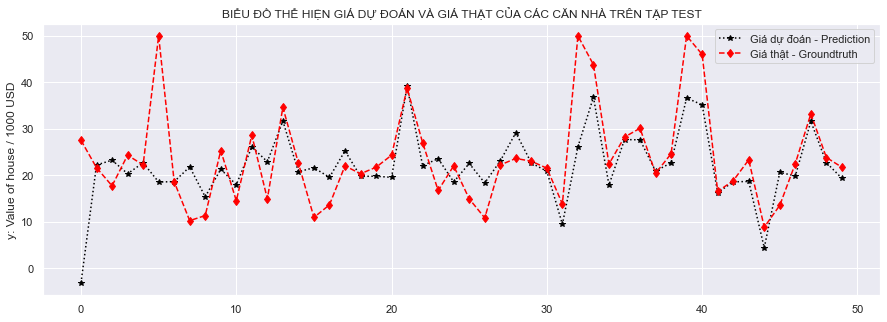

In [23]:
#Trực quan hóa kết quả
plt.figure(figsize=(15,5))
plt.plot(y_pred[:50], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test[:50], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Value of house / 1000 USD")
plt.legend()
plt.show()

### Thay đổi tham số của mô hình hồi quy:
---
Tham số mặc định:
* 'copy_X': True,
* 'fit_intercept': True,
* 'n_jobs': None,
* 'normalize': False,
* 'positive': False


In [24]:
#khai báo sử dụng model với các tham số mặc định
model_linear1 = LinearRegression(fit_intercept=False,normalize=True,copy_X=False)

#Các tham số của mô hình:
model_linear1.get_params()

{'copy_X': False,
 'fit_intercept': False,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

In [25]:
#Huấn luyện model:
model_linear1.fit(X_train,y_train)

LinearRegression(copy_X=False, fit_intercept=False, normalize=True)

In [26]:
#Lấy các hệ số của phương trình:
#hệ số w1:
w11 = model_linear1.coef_
w11

array([[3.65279843]])

In [27]:
#Hệ số w0 (bias):
w01 = model_linear1.intercept_
w01

0.0

### Phương trình đường thẳng xác định được:
$$\overline{y} = f(x) = w0 + w1*x_{RM} = 0 + 3.65279843*x_{RM}$$

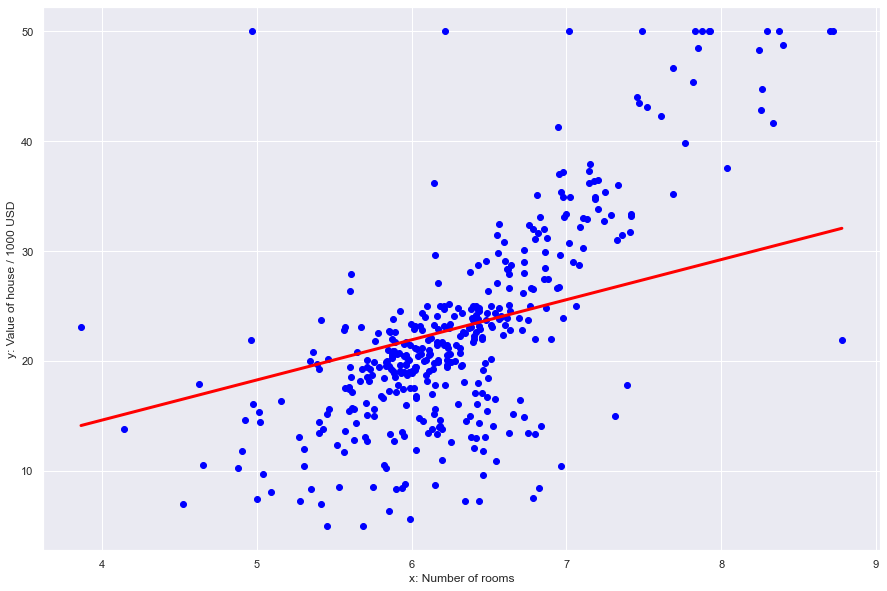

In [28]:
#Trực quan hóa đường hồi quy tuyến tính
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)

plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,model_linear1.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

In [29]:
#Giả sử có một căn nhà mới với số phòng trung bình: 6
x_rm1 = 6
print('Số phòng TB: ', x_rm1)
y_price1 = w01 +w11*x_rm1
print('--> Giá bán căn nhà tương ứng: ', y_price1)

Số phòng TB:  6
--> Giá bán căn nhà tương ứng:  [[21.91679057]]


In [30]:
#Kiểm tra trên tập Test:
y_pred1 =model_linear1.predict(X_test)
y_pred1.reshape(1,-1)

array([[13.0076152 , 22.88843495, 23.29024278, 22.15787526, 23.07107487,
        21.46019076, 21.49306595, 22.73136462, 20.2218921 , 22.5341135 ,
        21.23371726, 24.3933879 , 23.16239483, 26.57045576, 22.32590399,
        22.65465585, 21.85469299, 24.07194164, 21.93140176, 21.94966575,
        21.8473874 , 29.47443051, 22.82999017, 23.41809072, 21.47114916,
        23.01628289, 21.383482  , 23.2244924 , 25.59515858, 23.05646368,
        22.36243198, 17.92062909, 24.41165189, 28.56488371, 21.21180047,
        25.01801643, 24.99244684, 22.38069597, 23.06742207, 28.49913333,
        27.92564398, 20.56890795, 21.47480196, 21.50767714, 15.95542353,
        22.26745922, 21.97158254, 26.54488618, 23.08203327, 21.77067863,
        23.91121851, 23.45461871, 20.79538145, 22.38069597, 22.84460137,
        21.94966575, 26.16499514, 24.57237502, 22.21997284, 23.39617393,
        22.67657264, 21.5989971 , 21.68301147, 22.42818235, 22.3112928 ,
        23.39617393, 21.63917789, 21.46019076, 25.4

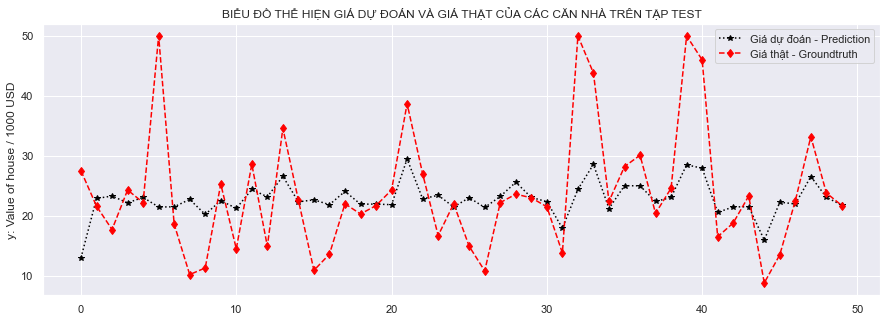

In [31]:
#Trực quan hóa kết quả
plt.figure(figsize=(15,5))
plt.plot(y_pred1[:50], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test[:50], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Value of house / 1000 USD")
plt.legend()
plt.show()

### Đánh giá độ chính xác của mô hình hồi quy
---
Các chỉ số cơ bản để đánh giá độ chính xác của mô hình hồi quy:

<img src='pic/Evaluation.jpg' width='500px'>


**1. MAE - Sai số tuyệt đối trung bình:** (MAE – Mean Absolute Error) nằm trong khoảng (0, +∞). MAE biểu thị biên độ trung bình của sai số mô hình nhưng không nói lên xu hướng lệch của giá trị dự đoán (predicted) và giá trị thực (Actual). Khi MAE = 0, các giá trị dự đoán hoàn toàn trùng khớp với các giá trị thực, khi đó mô hình được xem là “lý tưởng”!
<img src='pic/mae.jpg' width='300px'>

**2.MSE - Sai số bình phương trung bình:** nằm trong khoảng (0, +∞), MSE phản ánh mức độ dao động giữa giá trị dự đoán với giá trị thực.
<img src='pic/mse.jpg' width='300px'>

**RMSE - Sai số bình phương trung bình quân phương:** là một trong những đại lượng cơ bản và thường được sử dụng phổ biến trong đánh giá độ tin cậy của mô hình hồi quy. Người ta thường hay sử dụng RMSE biểu thị độ lớn trung bình của sai số. Đặc biệt RMSE rất nhạy với những giá trị sai số lớn. Giống như MAE, RMSE không chỉ ra độ lệch giữa giá trị dự báo và giá trị thực. Giá trị của RMSE nằm trong khoảng (0,+ ∞)

<img src = 'pic/RMSE.png' width='300px'>

**R2:** Đánh giá tỷ lệ giải thích của mô hình ước lượng, hệ số này nằm giữa 0 và 1, càng gần 1 tỷ lệ giải thích được của mô hình càng tốt.

<img src='pic/MLR_r2.png' width='400px'>
<img src='pic/R2.jpg'>



**A.Model sử dụng các tham số mặc định:**

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

#Đánh giá độ chính xác trên tập Train:
y_train_predict = model_linear.predict(X_train)
y_train_predict = y_train_predict.reshape(-1,1)

#Tính các sai số:
mae_train = mean_absolute_error(y_train, y_train_predict)
mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)

print('1.A) MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH:')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_train)
print('2.Sai số MSE  = ',mse_train)
print('3.Sai số RMSE = ',rmse_train)
print('4.Sai số R2   = ',r2_train)

1.A) MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH:
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
1.Sai số MAE  =  4.426589313650996
2.Sai số MSE  =  42.23309675755261
3.Sai số RMSE =  6.49869962050506
4.Sai số R2   =  0.5106487177355191


In [33]:
# Đánh giá độ chính xác trên tập TEST:
y_test = y_test.reshape(-1,1)

#Tính các sai số:
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2_test = r2_score(y_test, y_pred)

print("Độ chính xác của mô hình trên Kiểm thử:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_test)
print('2.Sai số MSE  = ',mse_test)
print('3.Sai số RMSE = ',rmse_test)
print('4.Sai số R2   = ',r2_test)

Độ chính xác của mô hình trên Kiểm thử:
--------------------------------------------
1.Sai số MAE  =  4.538993630294772
2.Sai số MSE  =  49.359238697733865
3.Sai số RMSE =  7.025613047822508
4.Sai số R2   =  0.3581009134356232


In [34]:
#Xác định mẫu dự đoán chênh lệch giữa giá thực và giá predict lớn nhất:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

31.480313617108052

**B. Model thay đổi tham số:**

In [35]:
#Đánh giá độ chính xác trên tập Train:
y_train_predict1 = model_linear1.predict(X_train)
y_train_predict1 = y_train_predict1.reshape(-1,1)

#Tính các sai số:
mae_train1 = mean_absolute_error(y_train, y_train_predict1)
mse_train1 = mean_squared_error(y_train, y_train_predict1)
rmse_train1 = (np.sqrt(mean_squared_error(y_train, y_train_predict1)))
r2_train1 = r2_score(y_train, y_train_predict1)

print('2.A) MÔ HÌNH HỒI QUY TUYẾN TÍNH THAY ĐỔI THAM SỐ')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_train1)
print('2.Sai số MSE  = ',mse_train1)
print('3.Sai số RMSE = ',rmse_train1)
print('4.Sai số R2   = ',r2_train1)

2.A) MÔ HÌNH HỒI QUY TUYẾN TÍNH THAY ĐỔI THAM SỐ
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
1.Sai số MAE  =  5.575669180963021
2.Sai số MSE  =  58.898347074985736
3.Sai số RMSE =  7.67452585343132
4.Sai số R2   =  0.3175498867662735


In [36]:
# Đánh giá độ chính xác trên tập TEST:
#Tính các sai số:
mae_test1 = mean_absolute_error(y_test, y_pred1)
mse_test1 = mean_squared_error(y_test, y_pred1)
rmse_test1 = (np.sqrt(mean_squared_error(y_test, y_pred1)))
r2_test1 = r2_score(y_test, y_pred1)

print("Độ chính xác của mô hình trên Kiểm thử:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_test1)
print('2.Sai số MSE  = ',mse_test1)
print('3.Sai số RMSE = ',rmse_test1)
print('4.Sai số R2   = ',r2_test1)

Độ chính xác của mô hình trên Kiểm thử:
--------------------------------------------
1.Sai số MAE  =  5.161300262929443
2.Sai số MSE  =  56.478975247933185
3.Sai số RMSE =  7.515249513351715
4.Sai số R2   =  0.2655113089618052


In [37]:
#Xác định mẫu dự đoán chênh lệch giữa giá thực và giá predict lớn nhất:
max_error(y_test, y_pred1)

28.53980923599077

<img src='pic/practice.jpg' width='200'>

## THỰC HÀNH TRÊN LỚP:
---
Sinh viên xây dựng mô hình hồi quy tuyến tính đơn giản với với một tham số: LSTAT



In [38]:
#Dữ liệu tỷ lệ phần trăm dân cư thu nhập dưới trung bình với giá nhà:
df_boston[['LSTAT','MEDV']].head(10)

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
5,5.21,28.7
6,12.43,22.9
7,19.15,27.1
8,29.93,16.5
9,17.10,18.9


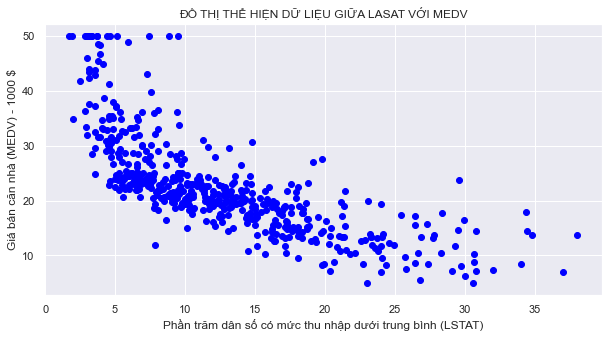

In [39]:
#Trực quan hóa dữ liệu phần trăm dân số thu nhập dưới mức trung bình (LSTAT) 
#với giá bán nhà (MEDV):
plt.figure(figsize=(10,5))
plt.scatter(df_boston['LSTAT'],
            df_boston['MEDV'],
            marker='o', 
            color='Blue')
plt.title('ĐỒ THỊ THỂ HIỆN DỮ LIỆU GIỮA LASAT VỚI MEDV')
plt.xlabel('Phần trăm dân số có mức thu nhập dưới trung bình (LSTAT)')
plt.ylabel('Giá bán căn nhà (MEDV) - 1000 $')
plt.show()

In [40]:
#Tách dữ liệu biến độc X(LSTAT) - Biến phụ thuộc Y(MEDV) để xây dựng mô hình hồi quy
X_lstat = df_boston['LSTAT'].values

#Tách biến phụ thuộc:
y_prices = df_boston['MEDV'].values

#Hiển thị 8 bộ tham số đầu tiên:
print('Tỷ lệ phần trăm thu nhập dưới trung bình:', X_lstat[:8])
print('Giá nhà                                 :', y_prices[:8])

Tỷ lệ phần trăm thu nhập dưới trung bình: [ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15]
Giá nhà                                 : [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1]


In [41]:
#Chia tập dữ liệu Train - Test:
from sklearn.model_selection import train_test_split
X_lstat_train, X_lstat_test, y_train, y_test = train_test_split(X_lstat, 
                                                    y_prices, 
                                                    test_size=0.2, 
                                                    random_state=50)
X_lstat_train = X_lstat_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


In [42]:
#Khởi tạo mô hình hồi quy tuyến tính với các tham số mặc định:
model_lstat = LinearRegression()
#Danh sách các tham số:
model_lstat.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [43]:
#Huấn luyện model:
model_lstat.fit(X_lstat_train,y_train)

LinearRegression()

In [44]:
#Xác định các hệ số và phương trình đường thẳng:
w1_lstat = model_lstat.coef_
print('w1 = ', w1_lstat)

w0_lstat = model_lstat.intercept_
print('w0 = ', w0_lstat)

print('Phương trình đường thẳng: Y^ = ', w0_lstat , ' + ' , w1_lstat , ' * x_lstat' )

w1 =  [[-0.94454876]]
w0 =  [34.54381086]
Phương trình đường thẳng: Y^ =  [34.54381086]  +  [[-0.94454876]]  * x_lstat


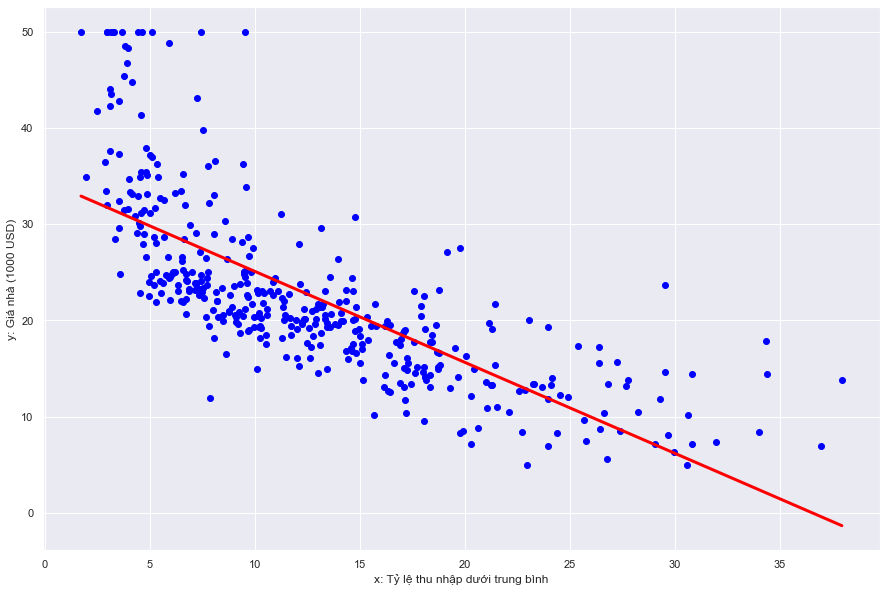

In [45]:
#Trực quan hóa các điểm dữ liệu và phương trình đường thẳng:
import numpy as np
xx=np.linspace(min(X_lstat_train),max(X_lstat_train)).reshape(-1,1)

plt.scatter(X_lstat_train,y_train,color="blue")
plt.plot(xx,model_lstat.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Giá nhà (1000 USD)")
plt.xlabel("x: Tỷ lệ thu nhập dưới trung bình")
plt.show()

In [46]:
#Giả sử có một căn nhà mới ở tại khu vực có tỷ lệ phần trăm dân cư thu nhập dưới tb: 15
#---> Giá bán căn nhà là bao nhiêu?
x_lstat = 15
print('Tỷ lệ phần trăm dân cư thu nhập dưới TB: ', x_lstat)
y_price = w0_lstat +w1_lstat*x_lstat
print('--> Giá bán căn nhà tương ứng: ', y_price)

Tỷ lệ phần trăm dân cư thu nhập dưới TB:  15
--> Giá bán căn nhà tương ứng:  [[20.3755794]]


In [47]:
#Dự đoán giá nhà trên tập Test:
X_lstat_test = X_lstat_test.reshape(-1,1)
y_lstat_pred = model_lstat.predict(X_lstat_test)

y_lstat_pred = np.round(y_lstat_pred.reshape(1,-1),1).ravel()

print('Giá nhà dự đoán: y^ = ', y_lstat_pred[:10])
print('Giá nhà dự đoán: y  = ', y_test[:10])


Giá nhà dự đoán: y^ =  [27.8 27.1 20.7 28.5 29.2 26.2 27.2 14.  12.3 29.1]
Giá nhà dự đoán: y  =  [27.5 21.6 17.7 24.3 22.2 50.  18.6 10.2 11.3 25.3]


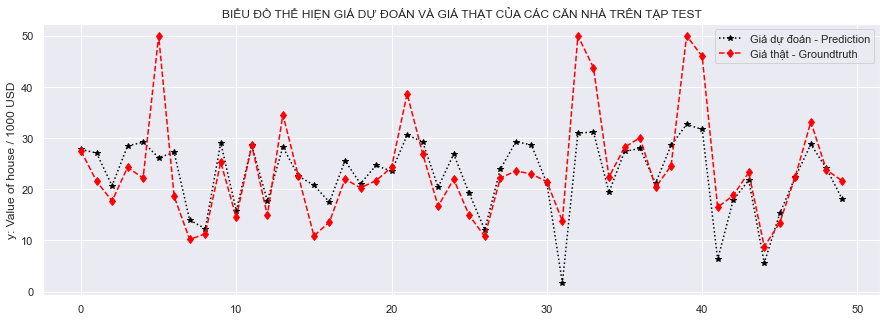

In [48]:
#Trực quan hóa kết quả 50 căn nhà đầu tiên:
plt.figure(figsize=(15,5))
plt.plot(y_lstat_pred[:50], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test[:50], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Value of house / 1000 USD")
plt.legend()
plt.show()


In [49]:
#Đánh giá sai số MAE, MSE, RMSE, R2 trên tập test:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

#Đánh giá độ chính xác trên tập Test:
y_test_pred = model_lstat.predict(X_lstat_test)
y_test_pred = np.round(y_test_pred.reshape(-1,1),1)

#Tính các sai số:
mae_lstat = mean_absolute_error(y_test, y_test_pred)
mse_lstat = mean_squared_error(y_test, y_test_pred)
rmse_lstat = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2_lstat = r2_score(y_test, y_test_pred)

print('MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI THUỘC TÍNH LSTAT:')
print("Độ chính xác của mô hình trên tập TEST:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_lstat)
print('2.Sai số MSE  = ',mse_lstat)
print('3.Sai số RMSE = ',rmse_lstat)
print('4.Sai số R2   = ',r2_lstat)

MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI THUỘC TÍNH LSTAT:
Độ chính xác của mô hình trên tập TEST:
--------------------------------------------
1.Sai số MAE  =  4.213725490196079
2.Sai số MSE  =  36.3543137254902
3.Sai số RMSE =  6.029453849685741
4.Sai số R2   =  0.5272252694987714


In [59]:
#Khởi tạo mô hình hồi quy tuyến tính với các tham số mặc định:
model_lstat2 = LinearRegression(fit_intercept = False)
#Danh sách các tham số:
model_lstat2.get_params()

{'copy_X': True,
 'fit_intercept': False,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [64]:
model_lstat2.fit(X_lstat_train,y_train)

LinearRegression(fit_intercept=False)

In [66]:
#Xác định các hệ số và phương trình đường thẳng:
w1_lstat2 = model_lstat2.coef_
print('w1 = ', w1_lstat2)

w0_lstat2 = model_lstat2.intercept_
print('w0 = ', w0_lstat2)

print('Phương trình đường thẳng: Y^ = ', w0_lstat2 , ' + ' , w1_lstat2 , ' * x_lstat' )

w1 =  [[1.10614164]]
w0 =  0.0
Phương trình đường thẳng: Y^ =  0.0  +  [[1.10614164]]  * x_lstat


In [67]:
x_lstat2 = 15
print('Tỷ lệ phần trăm dân cư thu nhập dưới TB: ', x_lstat2)
y_price2 = w0_lstat2 +w1_lstat2*x_lstat2
print('--> Giá bán căn nhà tương ứng: ', y_price2)

Tỷ lệ phần trăm dân cư thu nhập dưới TB:  15
--> Giá bán căn nhà tương ứng:  [[16.5921246]]


In [69]:
#Dự đoán giá nhà trên tập Test:
X_lstat_test2 = X_lstat_test.reshape(-1,1)
y_lstat_pred2 = model_lstat.predict(X_lstat_test)

y_lstat_pred2 = np.round(y_lstat_pred2.reshape(1,-1),1).ravel()

print('Giá nhà dự đoán: y^ = ', y_lstat_pred2[:10])
print('Giá nhà dự đoán: y  = ', y_test[:10])

Giá nhà dự đoán: y^ =  [27.8 27.1 20.7 28.5 29.2 26.2 27.2 14.  12.3 29.1]
Giá nhà dự đoán: y  =  [27.5 21.6 17.7 24.3 22.2 50.  18.6 10.2 11.3 25.3]


In [72]:
#Đánh giá sai số MAE, MSE, RMSE, R2 trên tập test:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

#Đánh giá độ chính xác trên tập Test:
y_test_pred2 = model_lstat2.predict(X_lstat_test)
y_test_pred2 = np.round(y_test_pred2.reshape(-1,1),1)

#Tính các sai số:
mae_lstat2 = mean_absolute_error(y_test, y_test_pred2)
mse_lstat2 = mean_squared_error(y_test, y_test_pred2)
rmse_lstat2 = (np.sqrt(mean_squared_error(y_test, y_test_pred2)))
r2_lstat2 = r2_score(y_test, y_test_pred2)

print('MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI THUỘC TÍNH LSTAT:')
print("Độ chính xác của mô hình trên tập TEST:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_lstat2)
print('2.Sai số MSE  = ',mse_lstat2)
print('3.Sai số RMSE = ',rmse_lstat2)
print('4.Sai số R2   = ',r2_lstat2)

MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI THUỘC TÍNH LSTAT:
Độ chính xác của mô hình trên tập TEST:
--------------------------------------------
1.Sai số MAE  =  13.371568627450984
2.Sai số MSE  =  290.6906862745098
3.Sai số RMSE =  17.049653552917427
4.Sai số R2   =  -2.780327470912683


### 2) Hồi quy tuyến tính nhiều chiều (nhiều biến độc lập)
---
Hồi quy 2 biến: $y=\beta_0+\beta_1 x_2+\beta_2 x_2$

Hồi quy $m$ biến: $y=\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_mx_m$

- $y$: biến phụ thuộc

- $x$: biến độc lập

- $\beta_0,\beta_1,\beta_2,\dots,\beta_m$: tham số của mô hình


<img src='pic/multi.png' width ='400px'>


### Xác định giá trị của tham số mô hình

- Xác định sai số ( hàm tổn thất) của mô hình.

- Chọn tham số để sai số nhỏ nhất.

## Mô hình lý thuyết

Giả sử rằng biến phụ thuộc $Y$ (output, dependent, response) có **quan hệ tuyến tính** 
với các biến đầu vào (independent, predictor) $X_1,X_2,\dots,X_m$ bởi công thức

$$ Y=\beta_0+\sum\limits_{j=1}^m \beta_j X_j+\varepsilon $$

trong đó $\varepsilon\sim N(0,\sigma^2)$ biến sai số không quan sát được (**error component**)


## Mục tiêu
Ước lượng các tham số $\beta_j$, phương sai $\sigma^2$, và sự ảnh hưởng các biến đầu vào đối với $Y$.

Giả sử ta có các $n$ quan sát $$(x_{i1},\dots,x_{im},y_i), i=1,2,\dots,n $$

$$y_i=\beta_0+\sum\limits_{j=1}^m \beta_j x_{ij}+e_i, i=1,2,\dots,n $$


với các $e_i$ là các sai số và cùng phân phối với $\varepsilon$

Ta sử dụng phương pháp **bình phương tối thiểu** ước lượng các $\beta_j$ sao cho sai số nhỏ nhất
$$SSE=\sum\limits_{i=1}^ne_i^2=\sum\limits_{i=1}^n (y_i-\beta_0-\sum\limits_{j=1}^m \beta_j x_{ij})^2 $$
$$\hat{\beta} =\arg\min SSE(\beta)$$

Tổng bình phương các sai số (SSE): $$SSE=\sum\limits_{i=1}^n \hat{e}_i^2=ESS(\hat{\beta}) $$
Hệ số $R^2$, $$ R^2=1-\dfrac{SSE}{SST}=1-\dfrac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{\sum\limits_{i=1}^n (y_i-\bar{y})^2}$$

###  a. Sử dụng 2 thuộc tính RM, LSTAT để dự đoán giá nhà:
---

In [50]:
#Sử dụng 2 thuộc tính RM, LSTAT để dự đoán giá nhà:
df_boston[['RM','LSTAT','MEDV']].head(10)

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
5,6.430,5.21,28.7
6,6.012,12.43,22.9
7,6.172,19.15,27.1
8,5.631,29.93,16.5
9,6.004,17.10,18.9


In [51]:
#Tách Biến độc lập X(RM, LSTAT) - Biến phụ thuộc Y (MEDV):
X_2 = df_boston[['RM','LSTAT']].values
y_prices = df_boston[['MEDV']].values

X_2[:10,:]

array([[ 6.575,  4.98 ],
       [ 6.421,  9.14 ],
       [ 7.185,  4.03 ],
       [ 6.998,  2.94 ],
       [ 7.147,  5.33 ],
       [ 6.43 ,  5.21 ],
       [ 6.012, 12.43 ],
       [ 6.172, 19.15 ],
       [ 5.631, 29.93 ],
       [ 6.004, 17.1  ]])

In [52]:
#Tách dữ liệu Train - Test:
# Biến X_2: Lưu trữ 2 biến độc lập (RM, LSTAT)
# Biến y_prices: Lưu trữ biến phụ thuộc (MEDV)

from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, 
                                                    y_prices, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(y_train_2))
print("2. Kích thước tập Test    : %d" %len(y_test_2))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


In [53]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression
#Khai báo model với các tham số mặc định:
model_2 = LinearRegression()

#Huấn luyện model:
model_2.fit(X_train_2, y_train_2)

LinearRegression()

In [54]:
#Xác định các hệ số và phương trình MẶT PHẲNG:
w = np.round(model_2.coef_,3)
print('w = ', w)

w0 = np.round(model_2.intercept_,3)
print('w0 = ', w0)

print('Phương trình mặt phẳng: Y^ = ', w0 , ' + ' , w[0,0] , ' * x_rm + ',w[0,1], '* x_lstat' )

w =  [[ 5.434 -0.615]]
w0 =  [-3.91]
Phương trình mặt phẳng: Y^ =  [-3.91]  +  5.434  * x_rm +  -0.615 * x_lstat


In [55]:
#Giả sử căn nhà mới có:
# Số phòng: x_rm = 6
# căn nhà ở khu vực có Tỷ lệ phần trăm dân số dưới mức trung bình là: 18.5
#--> Giá căn nhà là bao nhiêu?

x_rm = 6
x_lstat = 18.5

print('Thông số căn nhà: x_rm = ', x_rm, ', x_lstat = ', x_lstat)

y_price = w0 + w[0,0]*x_rm + w[0,1]*x_lstat
print('--> Giá của căn nhà: ', y_price)


Thông số căn nhà: x_rm =  6 , x_lstat =  18.5
--> Giá của căn nhà:  [17.3165]


In [56]:
#Dự đoán trên tập TEST

y_pred_2 = model_2.predict(X_test_2)
y_pred_2 = np.round(y_pred_2,1).ravel()

print('Giá nhà dự đoán: y^ = ', y_pred_2[:10])
print('Giá nhà dự đoán: y  = ', y_test_2[:10].ravel())


Giá nhà dự đoán: y^ =  [11.1 25.3 21.7 25.1 26.9 22.6 23.3 16.5 11.7 26. ]
Giá nhà dự đoán: y  =  [27.5 21.6 17.7 24.3 22.2 50.  18.6 10.2 11.3 25.3]


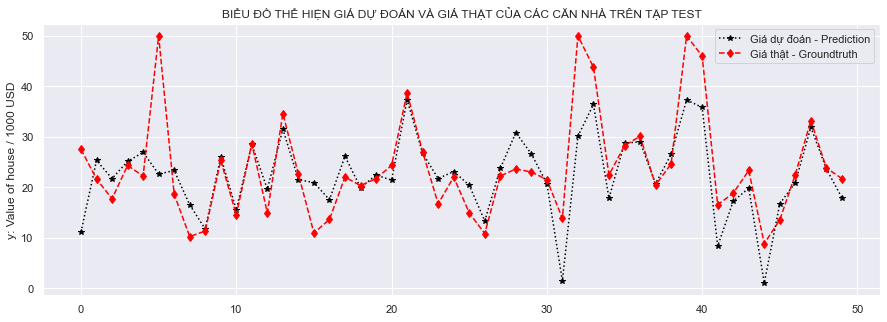

In [57]:
#Trực quan hóa kết quả 50 căn nhà đầu tiên:
plt.figure(figsize=(15,5))
plt.plot(y_pred_2[:50], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test_2[:50], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Value of house / 1000 USD")
plt.legend()
plt.show()


In [58]:
#Đánh giá sai số MAE, MSE, RMSE, R2 trên tập test:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

#Đánh giá độ chính xác trên tập Test:
y_test_pred_2 = model_2.predict(X_test_2)
y_test_pred_2 = np.round(y_test_pred_2.reshape(-1,1),1)

#Tính các sai số:
mae_2 = mean_absolute_error(y_test_2, y_test_pred_2)
mse_2 = mean_squared_error(y_test_2, y_test_pred_2)
rmse_2 = (np.sqrt(mean_squared_error(y_test_2, y_test_pred_2)))
r2_2 = r2_score(y_test_2, y_test_pred)

print('MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI 2 THUỘC TÍNH RM và LSTAT:')
print("Độ chính xác của mô hình trên tập TEST:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_2)
print('2.Sai số MSE  = ',mse_2)
print('3.Sai số RMSE = ',rmse_2)
print('4.Sai số R2   = ',r2_2)

MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI 2 THUỘC TÍNH RM và LSTAT:
Độ chính xác của mô hình trên tập TEST:
--------------------------------------------
1.Sai số MAE  =  3.7852941176470587
2.Sai số MSE  =  32.590490196078434
3.Sai số RMSE =  5.70880812395008
4.Sai số R2   =  0.5272252694987714


In [73]:
from sklearn.linear_model import LinearRegression
#Khai báo model với các tham số mặc định:
model_21 = LinearRegression()

#Huấn luyện model:
model_21.fit(X_train_2, y_train_2)

LinearRegression()

In [74]:
#Xác định các hệ số và phương trình MẶT PHẲNG:
w1 = np.round(model_21.coef_,3)
print('w = ', w)

w01 = np.round(model_21.intercept_,3)
print('w0 = ', w01)

print('Phương trình mặt phẳng: Y^ = ', w01 , ' + ' , w1[0,0] , ' * x_rm + ',w1[0,1], '* x_lstat' )

w =  [[ 5.434 -0.615]]
w0 =  [-3.91]
Phương trình mặt phẳng: Y^ =  [-3.91]  +  5.434  * x_rm +  -0.615 * x_lstat


In [75]:
#Dự đoán trên tập TEST

y_pred_21 = model_21.predict(X_test_2)
y_pred_21 = np.round(y_pred_21,1).ravel()

print('Giá nhà dự đoán: y^ = ', y_pred_21[:10])
print('Giá nhà dự đoán: y  = ', y_test_2[:10].ravel())


Giá nhà dự đoán: y^ =  [11.1 25.3 21.7 25.1 26.9 22.6 23.3 16.5 11.7 26. ]
Giá nhà dự đoán: y  =  [27.5 21.6 17.7 24.3 22.2 50.  18.6 10.2 11.3 25.3]


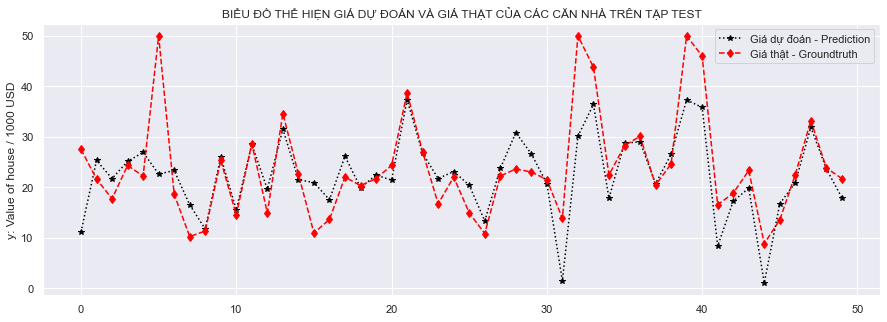

In [77]:
#Trực quan hóa kết quả 50 căn nhà đầu tiên:
plt.figure(figsize=(15,5))
plt.plot(y_pred_21[:50], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test_2[:50], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Value of house / 1000 USD")
plt.legend()
plt.show()


In [80]:
#Đánh giá sai số MAE, MSE, RMSE, R2 trên tập test:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

#Đánh giá độ chính xác trên tập Test:
y_test_pred_21 = model_21.predict(X_test_2)
y_test_pred_21 = np.round(y_test_pred_21.reshape(-1,1),1)

#Tính các sai số:
mae_2 = mean_absolute_error(y_test_2, y_test_pred_21)
mse_2 = mean_squared_error(y_test_2, y_test_pred_21)
rmse_2 = (np.sqrt(mean_squared_error(y_test_2, y_test_pred_21)))
r2_2 = r2_score(y_test_2, y_test_pred_21)

print('MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI 2 THUỘC TÍNH RM và LSTAT:')
print("Độ chính xác của mô hình trên tập TEST:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_2)
print('2.Sai số MSE  = ',mse_2)
print('3.Sai số RMSE = ',rmse_2)
print('4.Sai số R2   = ',r2_2)

MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI 2 THUỘC TÍNH RM và LSTAT:
Độ chính xác của mô hình trên tập TEST:
--------------------------------------------
1.Sai số MAE  =  3.7852941176470587
2.Sai số MSE  =  32.590490196078434
3.Sai số RMSE =  5.70880812395008
4.Sai số R2   =  0.576172436214895


### b. Sử dụng tất cả các thuộc tính để dự đoán giá nhà:
---

In [81]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [82]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [83]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [84]:
#Đọc dữ liệu vào các độc lập và phụ thuộc
X_boston = df_boston.iloc[:,:13].values
y_boston = df_boston.iloc[:, -1].values

In [85]:
X_boston[:2,:]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

### Tách tập dữ liệu theo tỷ lệ 80%:20% cho việc train và test
---

In [86]:
# Biến X_boston: Lưu trữ 13 biến độc lập (input)
# Biến y_boston: Lưu trữ biến phụ thuộc (target)

from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_boston, 
                                                    y_boston, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(y_train_all))
print("2. Kích thước tập Test    : %d" %len(y_test_all))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


In [87]:
X_train_all[:2,:]

array([[  7.52601,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.417  ,
         98.3    ,   2.185  ,  24.     , 666.     ,  20.2    , 304.21   ,
         19.31   ],
       [ 18.4982 ,   0.     ,  18.1    ,   0.     ,   0.668  ,   4.138  ,
        100.     ,   1.137  ,  24.     , 666.     ,  20.2    , 396.9    ,
         37.97   ]])

In [88]:
y_train_all[:2]

array([13. , 13.8])

In [89]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression
#Khai báo model với các tham số mặc định:
model_all = LinearRegression()

#Huấn luyện model:
model_all.fit(X_train_all, y_train_all)

LinearRegression()

### Xác định các hệ số của phương trình:
---

$$ ŷ_{MEDV} = f(x) = w_0 + w_1.X_{CRIM} + w_2.X_{ZN} + w_3.X_{INDUS} + w_4.X_{CHAS}+ w_5.X_{NOX} + w_6.X_{RM} + w_7.X_{AGE} + w_8.X_{DIS} + w_9.X_{RAD} + w_{10}.X_{TAX} + w_{11}.X_{PTRATIO} + w_{12}.X_B + w_{13}.X_{LSTAT} $$   

In [90]:
w0 = np.round(model_all.intercept_,3)
print('w0 =',w0)
dem=1
for i in model_all.coef_:
    x = 'w'+str(dem)
    print(x,'=',np.round(i,3))
    dem=dem+1

w0 = 38.316
w1 = -0.105
w2 = 0.039
w3 = 0.06
w4 = 0.849
w5 = -21.142
w6 = 4.189
w7 = 0.006
w8 = -1.453
w9 = 0.298
w10 = -0.014
w11 = -1.091
w12 = 0.008
w13 = -0.477


In [91]:
#Các hệ số ứng với từng biến độc lập:
coeff_df = pd.DataFrame(np.round(model_all.coef_,3), 
                        list(df_boston.columns[:13]), 
                        columns =['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.105
ZN,0.039
INDUS,0.060
CHAS,0.849
NOX,-21.142
RM,4.189
AGE,0.006
DIS,-1.453
RAD,0.298
TAX,-0.014


In [92]:
w0 = np.round(model_all.intercept_,3)
print('w0 =',w0)

w0 = 38.316


**Phương trình siêu phẳng:**

$$ ŷ_{MEDV} = f(x) = 38.316 + (-0.105).X_{CRIM} + 0.039.X_{ZN} + 0.060.X_{INDUS} + 0.849.X_{CHAS}+ (-21.142).X_{NOX} + (4.189).X_{RM} + 0.006.X_{AGE} + (-1.453).X_{DIS} + (0.298).X_{RAD} + (-0.014).X_{TAX} + (-1.091).X_{PTRATIO} + (0.008).X_B + (-0.477).X_{LSTAT} $$

In [93]:
#Sử dụng model huấn luyện được trên tập Train để dự đoán trên tập Test
y_pred_all = model_all.predict(X_test_all)
y_pred_all = np.round(y_pred_all,1)
print(y_pred_all)

[12.3 25.7 19.6 29.7 21.8 23.3 16.3 16.7 13.  25.2 14.  29.3 17.3 35.4
 18.2 14.1 14.1 29.3 23.4 25.3 24.7 36.6 31.5 19.2 20.9 16.8 11.3 24.6
 31.1 23.4 21.   6.1 30.1 35.6 21.3 32.8 35.4 20.7 29.3 39.8 39.4 13.
 21.6 25.3  2.9 14.3 22.4 34.1 27.5 21.3 30.7 25.6 15.2 19.3 25.3 22.3
 32.9 24.5 19.4 19.  15.8 21.1 15.4 23.7 19.9 20.2 15.8 23.6 25.3 19.8
 30.1  7.3 18.7 20.8 20.7 20.1 13.6 10.2 17.9 21.  20.2 23.5 22.7 12.7
 20.8 22.4 28.6 26.5 20.1 19.8 13.4 30.4 43.6 13.5 18.1 17.8 18.2 33.2
 17.6 18.9 30.  26. ]


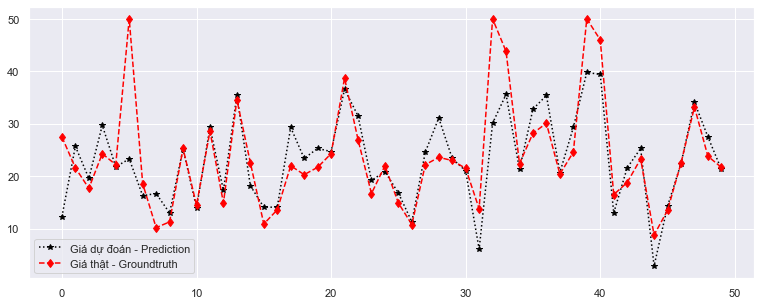

In [94]:
#Trực quan hóa kết quả dự đoán với kết quả groudtruth
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
plt.plot(y_pred_all[:50], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test_all[:50], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.legend()
plt.grid(True)


In [95]:
#Đánh giá sai số MAE, MSE, RMSE, R2 trên tập test:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

#Tính các sai số:
mae_all = mean_absolute_error(y_test_all, y_pred_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)
rmse_all = (np.sqrt(mean_squared_error(y_test_all, y_pred_all)))
r2_all = r2_score(y_test_all, y_pred_all)

print('MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI TẤT CẢ CÁC THUỘC TÍNH:')
print("Độ chính xác của mô hình trên tập TEST:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_all)
print('2.Sai số MSE  = ',mse_all)
print('3.Sai số RMSE = ',rmse_all)
print('4.Sai số R2   = ',r2_all)

MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI TẤT CẢ CÁC THUỘC TÍNH:
Độ chính xác của mô hình trên tập TEST:
--------------------------------------------
1.Sai số MAE  =  3.398039215686274
2.Sai số MSE  =  26.306470588235292
3.Sai số RMSE =  5.128983387400986
4.Sai số R2   =  0.6578938434458443


## THỰC HÀNH 8
---
### Yêu cầu 1: 
Sinh viên tìm hiểu về tập dữ liệu mẫu Diabetes Dataset của Sklearn (xác định các features đầu vào (input) và label đầu ra (target))


In [ ]:
#{Sinh viên viết code ở đây!}





**Yêu cầu 2:**
---
* Trong tập dữ liệu Diabetes xác định thuộc tính có ảnh hưởng lớn nhất (hệ số tương quan cao nhất) tới thuộc tính target.
* Tách tập dữ liệu thành 2 phần Train – Test với tỷ lệ 75%-25%

In [ ]:
#{Sinh viên viết code ở đây!}





### Yêu cầu 3:
---
* 1) Xây dựng mô hình hồi quy tuyến tính đơn giản (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
* 2) Xây dựng mô hình hồi quy tuyến tính với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.


In [ ]:
#{Sinh viên viết code ở đây!}




# SINH VIÊN THAM KHẢO THÊM

## II) THUẬT TOÁN KNN CHO BÀI TOÁN HỒI QUY (KNN Regression)
---
* Tương tự như đối với bài toán phân lớp. Xác định những điểm dữ liệu gần nhất với điểm dữ liệu mới!
* Nhãn của điểm dữ liệu mới được là nhãn của điểm dữ liệu đã biết gần nhất (K=1) hoặc trung bình có trọng số của những điểm gần nhất.
<img src='pic/knn_regression.png' width='600px'>

Cho tập huấn luyện $(x_i,y_i)$. Dự báo giá trị tại mẫu $x$.

- Tìm $k$ lân cận gần nhất với $x$ từ mẫu $x_i$ của tập huấn luyện 

- Ký hiệu $N(x)=\{x_{i_1},\dots,x_{i_k}\}$ là tập mẫu tìm được

- Giá trị dự báo của $x$ là $y=f(x)=Average(y_i: x_i\in N(x))$

## Ví dụ: Dự đoán giá nhà với thuật toán KNN
---
### A) Sử dụng một biến độc lập RM để dự đoán giá nhà

In [ ]:
#Load dữ liệu từ datasets:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston["MEDV"] = boston.target
df_boston.info()

In [ ]:
import matplotlib.pyplot as plt
#Trực quan hóa mối quan hệ giữa giá nhà với số phòng trung bình
plt.scatter(df_boston['RM'],df_boston['MEDV'],marker='*', color='Blue')
plt.title('Biểu đồ quan hệ giữa thuộc tính RM với giá nhà MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [ ]:
#Lấy dữ liệu input và target.
X_rm = df_boston['RM'].values
y_prices =  df_boston['MEDV'].values

In [ ]:
#tách tỷ lệ Train - Test
#Sử dụng thuộc tính RM để dự đoán
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rm, 
                                                    y_prices, 
                                                    test_size=0.2, 
                                                    random_state=50)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

In [ ]:
#Khai báo sử dụng thuật toán hồi quy KNN
from sklearn.neighbors import KNeighborsRegressor

#Trường hợp với n = 8
knn_reg = KNeighborsRegressor(n_neighbors=8)

#Huấn luyện model
knn_reg.fit(X_train,y_train)
print(knn_reg)

In [ ]:
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)
plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,knn_reg.predict(xx),color="red",linewidth=3)
plt.title('Mô hình hồi quy KNN với k=8')
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
y_train_predict = knn_reg.predict(X_train)
y_train_predict = y_train_predict.reshape(-1,1)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('A) MÔ HÌNH HỒI QUY KNN SỬ DỤNG 1 BIẾN ĐỘC LẬP-RM')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = knn_reg.predict(X_test)
y_test_predict = y_test_predict.reshape(-1,1)

y_test = y_test.reshape(-1,1)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Độ chính xác của mô hình trên tập kiểm thử:")
print("-------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))

In [ ]:
#Trực quan hóa kết quả dự đoán với kết quả groudtruth
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
plt.plot(y_test_predict[:40], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test[:40], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.legend()
plt.grid(True)

### B) Sử dụng tất cả các biến để dự đoán giá nhà
---

In [ ]:
# Biến X_boston: Lưu trữ 13 biến độc lập (input)
# Biến y_boston: Lưu trữ biến phụ thuộc (target)
# Tách tập dữ liệu theo tỷ lệ 80%- 20%

from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train, y_test = train_test_split(X_boston, 
                                                    y_boston, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

In [ ]:
#Sử dụng thuật toán hồi quy KNN với k=3
knn_reg_all = KNeighborsRegressor(n_neighbors = 3)

#Huấn luyện
knn_reg_all.fit(X_train_all,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
y_train_predict = knn_reg_all.predict(X_train_all)
y_train_predict = y_train_predict.reshape(-1,1)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('B) MÔ HÌNH HỒI QUY KNN SỬ DỤNG TẤT CẢ BIẾN ĐỘC LẬP:')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = knn_reg_all.predict(X_test_all)
y_test_predict = y_test_predict.reshape(-1,1)

y_test = y_test.reshape(-1,1)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Độ chính xác của mô hình trên tập kiểm thử:")
print("-------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))

In [ ]:
#Trực quan hóa kết quả dự đoán với kết quả groudtruth
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
plt.plot(y_test_predict[:80], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test[:80], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.legend()
plt.grid(True)

## THỰC HÀNH 3.4
---
Yêu cầu 1, 2 giống với bài thực hành 3.3

Yêu cầu 3:
1. Xây dựng mô hình KNN cho bài toán hồi quy (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
2. Xây dựng mô hình KNN cho bài toán hồi quy với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.

In [ ]:
#{Sinh viên viết code ở đây}




In [ ]:
2%200